## Import Library

In [2]:
# Cell 1: import dasar
import pandas as pd
import numpy as np

# optional: untuk plotting nanti
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Cell 2: load dataset dari URL yang tercantum di tugas
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)


In [4]:
# Cell 3: quick look
print("Shape:", df.shape)
display(df.head(10))


Shape: (225, 10)


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
5,Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333
6,Antigua and Barbuda,Antigua and Barbuda,ATG,99348,Latin America and the Caribbean,7493,135,75422,1359,1.801682
7,Argentina,Argentina,ARG,45921761,Latin America and the Caribbean,9041124,128065,196881,2789,1.416472
8,Armenia,Armenia,ARM,2972939,Asia,422574,8617,142140,2898,2.039169
9,Aruba,Aruba,ABW,107560,Latin America and the Caribbean,34051,212,316577,1971,0.622596


In [5]:
# Cell 4: informasi kolom + tipe + missing
display(df.info())
display(df.isnull().sum().sort_values(ascending=False).head(30))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


None

Other names                1
Country                    0
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [6]:
# Cell 5: deskriptif statistik untuk kolom numerik
display(df.describe().T)


,count,mean,std,min,25%,50%,75%,max
Population,225.0,3.507321e+07,1.392418e+08,805.0,566557.000000,5.827911e+06,2.190585e+07,1.439324e+09
Total Cases,225.0,2.184781e+06,7.275938e+06,1.0,24071.000000,1.639360e+05,1.092547e+06,8.183905e+07
Total Deaths,225.0,2.744813e+04,9.689177e+04,0.0,189.000000,1.965000e+03,1.366000e+04,1.008222e+06
Tot Cases//1M pop,225.0,1.369004e+05,1.450603e+05,9.0,11384.000000,8.898700e+04,2.233350e+05,6.960440e+05
Tot Deaths/1M pop,225.0,1.096716e+03,1.195716e+03,0.0,123.000000,7.080000e+02,1.795000e+03,6.286000e+03
Death percentage,225.0,1.444125e+00,1.741728e+00,0.0,0.511291,1.036905e+00,1.977017e+00,1.815179e+01


# Step 2 — Data Cleaning & Preprocessing

In [7]:
# Cell: handle missing minimal
df['Other names'] = df['Other names'].fillna("Unknown")


In [8]:
# Cell: check duplicates
print("Duplicates:", df.duplicated().sum())

# drop jika ada
df = df.drop_duplicates()


Duplicates: 0


In [9]:
# Cell: rename columns for convenience
df_clean = df.rename(columns={
    "ISO 3166-1 alpha-3 CODE": "ISO3",
    "Total Cases": "Total_Cases",
    "Total Deaths": "Total_Deaths",
    "Tot Cases//1M pop": "Cases_per_1M",
    "Tot Deaths/1M pop": "Deaths_per_1M",
    "Death percentage": "Death_Percentage"
})


In [10]:
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            225 non-null    object 
 1   Other names        225 non-null    object 
 2   ISO3               225 non-null    object 
 3   Population         225 non-null    int64  
 4   Continent          225 non-null    object 
 5   Total_Cases        225 non-null    int64  
 6   Total_Deaths       225 non-null    int64  
 7   Tot Cases//1M pop  225 non-null    int64  
 8   Tot Deaths/1M pop  225 non-null    int64  
 9   Death_Percentage   225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


,Country,Other names,ISO3,Population,Continent,Total_Cases,Total_Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death_Percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [13]:
df.columns.tolist()


['Country',
 'Other names',
 'ISO 3166-1 alpha-3 CODE',
 'Population',
 'Continent',
 'Total Cases',
 'Total Deaths',
 'Tot\xa0Cases//1M pop',
 'Tot\xa0Deaths/1M pop',
 'Death percentage']

In [14]:
# fix rename using exact column names
df_clean = df.rename(columns={
    df.columns[2]: "ISO3",
    df.columns[5]: "Total_Cases",
    df.columns[6]: "Total_Deaths",
    df.columns[7]: "Cases_per_1M",
    df.columns[8]: "Deaths_per_1M",
    df.columns[9]: "Death_Percentage"
})


In [15]:
numeric_cols = ['Population','Total_Cases','Total_Deaths',
                'Cases_per_1M','Deaths_per_1M','Death_Percentage']

Q1 = df_clean[numeric_cols].quantile(0.25)
Q3 = df_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numeric_cols] > (Q3 + 1.5 * IQR))
outlier_mask.sum()


Population          27
Total_Cases         38
Total_Deaths        29
Cases_per_1M         1
Deaths_per_1M        6
Death_Percentage    10
dtype: int64

In [16]:
df_clean = df_clean.rename(columns={
    'Tot\xa0Cases//1M pop': 'Cases_per_1M',
    'Tot\xa0Deaths/1M pop': 'Deaths_per_1M'
})


In [17]:
df_clean.columns


Index(['Country', 'Other names', 'ISO3', 'Population', 'Continent',
       'Total_Cases', 'Total_Deaths', 'Cases_per_1M', 'Deaths_per_1M',
       'Death_Percentage'],
      dtype='object')

# Exploratory Data Analysis (EDA)

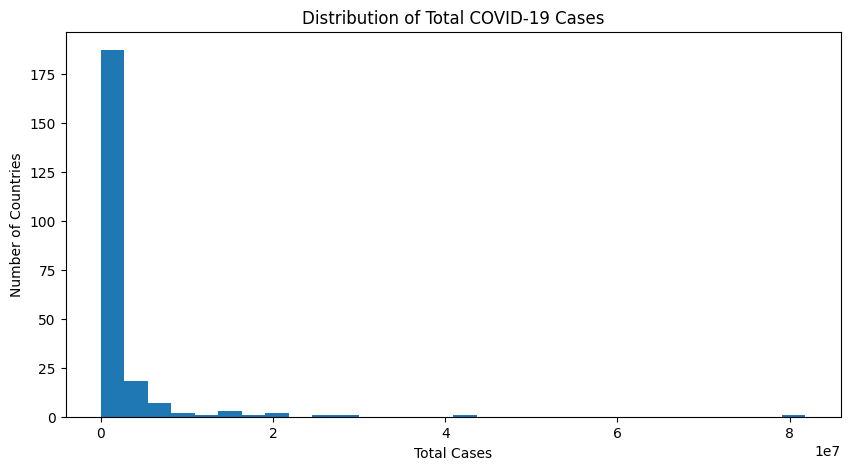

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df_clean['Total_Cases'], bins=30)
plt.title("Distribution of Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Number of Countries")
plt.show()


Insight:
Distribusi sangat right-skewed → mayoritas negara memiliki total kasus yang relatif rendah.
Ada beberapa outlier besar (misalnya USA, India, Brazil) yang memiliki kasus puluhan juta.
80% negara berada di bawah 1 juta kasus total, menunjukkan penyebaran global yang tidak merata.
Histogram menunjukkan bahwa kapasitas testing, populasi, dan kecepatan penyebaran berbeda jauh antar negara.
Karena skala berbeda terlalu lebar, clustering perlu menggunakan scaling (StandardScaler) agar tidak didominasi negara berkasus besar.

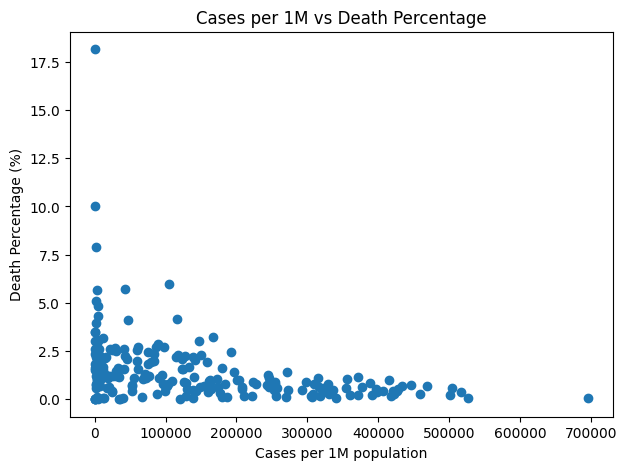

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(df_clean['Cases_per_1M'], df_clean['Death_Percentage'])
plt.xlabel("Cases per 1M population")
plt.ylabel("Death Percentage (%)")
plt.title("Cases per 1M vs Death Percentage")
plt.show()


Insight:
Terdapat kecenderungan bahwa negara dengan kasus per 1 juta penduduk lebih tinggi juga memiliki death percentage lebih tinggi, meskipun korelasinya tidak linear.
Beberapa negara kecil Eropa muncul sebagai outlier dengan kasus per 1M sangat tinggi (misal Andorra, San Marino), tetapi death percentage rendah → sistem kesehatan relatif kuat.
Negara dengan death percentage sangat tinggi biasanya memiliki sistem kesehatan yang lebih lemah, keterlambatan respons pandemi, atau populasi lansia yang lebih besar.
Penyebaran titik yang lebar menunjukkan bahwa faktor sosial-ekonomi dan kapasitas medis sangat berpengaruh, bukan hanya jumlah kasus.
Pola tidak membentuk cluster alami secara visual → mendukung penggunaan metode clustering seperti KMeans dan HAC.

In [20]:
import plotly.express as px

fig = px.choropleth(
    df_clean,
    locations="ISO3",
    color="Cases_per_1M",
    hover_name="Country",
    color_continuous_scale="Reds",
    title="COVID-19 Cases per 1M Population"
)
fig.show()


Insight:
Kasus per 1M tertinggi terlihat di Eropa dan Amerika Utara, dengan warna merah tua yang menandakan gelombang besar Covid-19 dalam periode tertentu.
Afrika secara umum memiliki nilai lebih rendah → kemungkinan karena testing yang lebih terbatas atau populasi usia muda.
Beberapa negara kecil di Eropa (Luksemburg, Andorra, San Marino, Iceland) menunjukkan nilai yang sangat tinggi karena populasi kecil → sehingga kasus sedikit saja membuat rasio per 1M tinggi.
Asia dan Amerika Latin berada di level menengah hingga tinggi, menunjukkan penyebaran yang luas namun bervariasi antar negara.
World map memperkuat kesimpulan bahwa dampak Covid global sangat berbeda tergantung wilayah, sehingga clustering negara berdasarkan indikator Covid masuk akal untuk analisis kebijakan.

# Feature Encoding & Scaling

In [21]:
# One-hot encoding untuk Continent (optional)
continent_dummies = pd.get_dummies(df_clean['Continent'], prefix='Cont')

# Gabungkan hasil encoding ke dataframe
df_encoded = pd.concat([df_clean, continent_dummies], axis=1)

# Cek hasil
df_encoded.head()


,Country,Other names,ISO3,Population,Continent,Total_Cases,Total_Deaths,Cases_per_1M,Deaths_per_1M,Death_Percentage,Cont_Africa,Cont_Asia,Cont_Europe,Cont_Latin America and the Caribbean,Cont_Northern America,Cont_Oceania
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,False,True,False,False,False,False
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,False,False,True,False,False,False
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,True,False,False,False,False,False
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,False,False,True,False,False,False
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,True,False,False,False,False,False


In [22]:
features = ['Population','Total_Cases','Total_Deaths',
            'Cases_per_1M','Deaths_per_1M','Death_Percentage']

X = df_clean[features]
X.head()


,Population,Total_Cases,Total_Deaths,Cases_per_1M,Deaths_per_1M,Death_Percentage
0,40462186,177827,7671,4395,190,4.313743
1,2872296,273870,3492,95349,1216,1.275058
2,45236699,265691,6874,5873,152,2.587216
3,77481,40024,153,516565,1975,0.382271
4,34654212,99194,1900,2862,55,1.915438


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert ke DataFrame biar rapi
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()


,Population,Total_Cases,Total_Deaths,Cases_per_1M,Deaths_per_1M,Death_Percentage
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


# Elbow + Silhouette Method

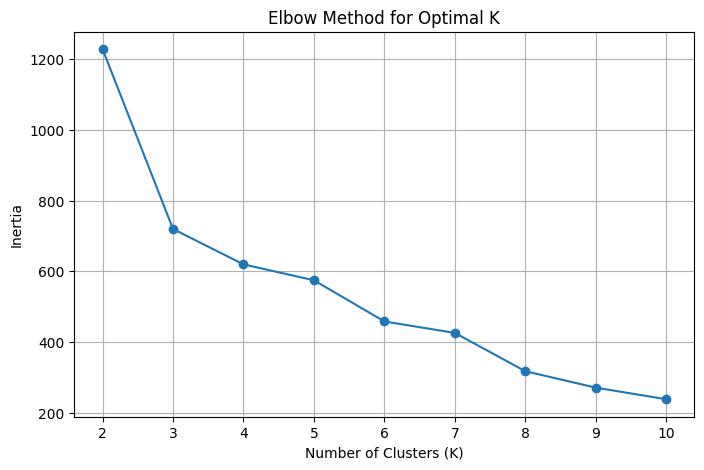

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


menggunakan k = 4 dikarenakan Elbow masih menunjukkan titik melambat di K=4
Silhouette K=4 (0.4037) lebih baik dari K=3 (0.3826)
Memberi pemetaan negara yang lebih detail (4 kategori dampak COVID)

In [25]:
from sklearn.metrics import silhouette_score

silhouette_results = {}

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    silhouette_results[k] = sil

silhouette_results


{2: np.float64(0.5174457704803319),
 3: np.float64(0.38258053442776624),
 4: np.float64(0.4037117822529971),
 5: np.float64(0.2958826320670577),
 6: np.float64(0.3583562965355973),
 7: np.float64(0.35573796153526815),
 8: np.float64(0.33394880906092056),
 9: np.float64(0.3475317228258283),
 10: np.float64(0.3469395443609355)}

# KMeans Clustering (K = 4)

In [26]:
from sklearn.cluster import KMeans

# K terbaik
k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df_clean['KMeans_Cluster'] = cluster_labels
df_clean[['Country', 'KMeans_Cluster']].head()


,Country,KMeans_Cluster
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,3
4,Angola,0


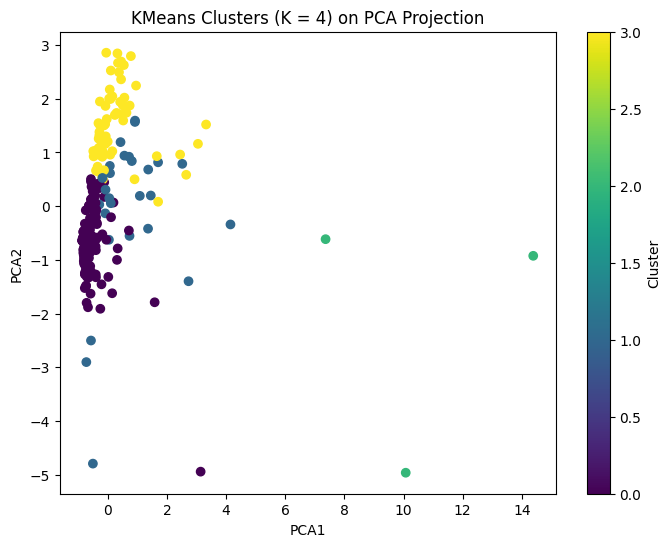

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_clean['PCA1'] = pca_result[:, 0]
df_clean['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(df_clean['PCA1'], df_clean['PCA2'], 
            c=df_clean['KMeans_Cluster'], cmap='viridis')

plt.title("KMeans Clusters (K = 4) on PCA Projection")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()


menggunakan K = 4 menghasilkan empat kelompok negara berdasarkan tingkat dampak COVID-19, dengan perbedaan yang terlihat pada indikator kasus total, kematian total, dan rasio per populasi. Visualisasi PCA menunjukkan pemisahan cluster yang cukup jelas, meskipun terdapat sedikit overlap karena kompleksitas data. K = 4 dipilih karena memberikan keseimbangan antara Elbow Method dan Silhouette Score, serta memberikan segmentasi yang lebih informatif untuk analisis kebijakan.

# Hierarchical Clustering (HCA / HAC)

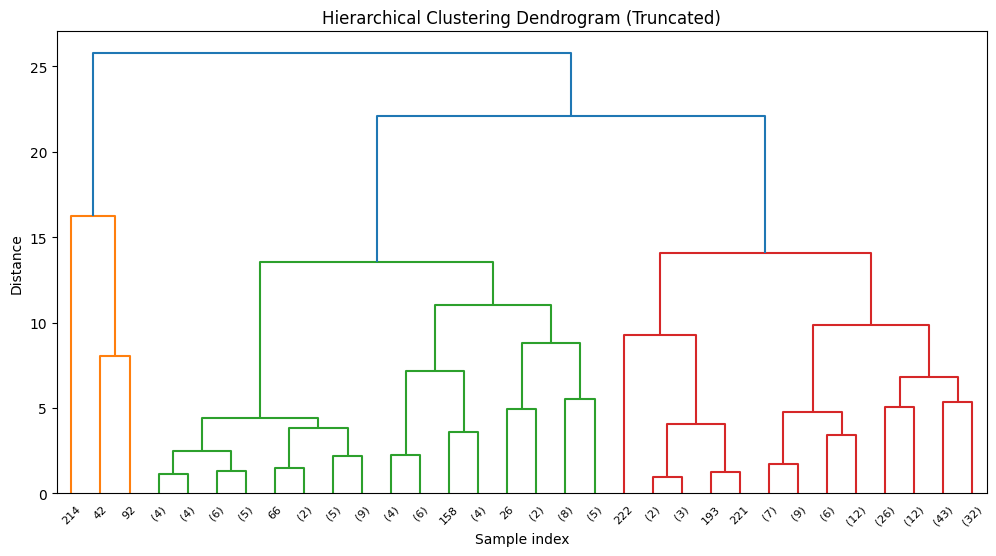

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
Z = linkage(X_scaled, method='ward')  # ward = paling umum untuk numeric
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


In [29]:
from scipy.cluster.hierarchy import fcluster

hca_labels = fcluster(Z, t=4, criterion='maxclust')

df_clean['HCA_Cluster'] = hca_labels
df_clean[['Country', 'HCA_Cluster']].head()


,Country,HCA_Cluster
0,Afghanistan,4
1,Albania,4
2,Algeria,4
3,Andorra,3
4,Angola,4


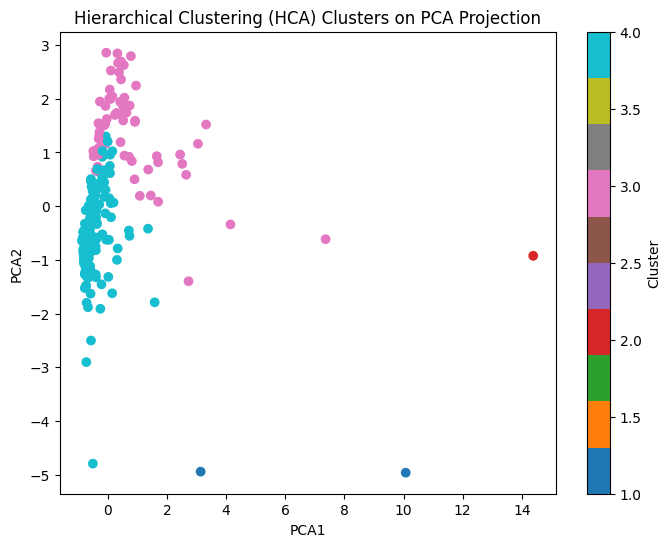

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['PCA1'], df_clean['PCA2'], 
            c=df_clean['HCA_Cluster'], cmap='tab10')
plt.title("Hierarchical Clustering (HCA) Clusters on PCA Projection")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()


Hierarchical Agglomerative Clustering (HAC) menghasilkan struktur pengelompokan bertingkat yang divisualisasikan dalam dendrogram.
Dengan metode Ward, negara-negara dikelompokkan berdasarkan kemiripan indikator pandemi COVID-19.
Pemotongan dendrogram pada tingkat yang stabil menunjukkan bahwa 4 cluster merupakan pilihan yang konsisten dan logis, selaras dengan hasil KMeans.
Visualisasi PCA menunjukkan pemisahan antar cluster yang cukup jelas, meskipun terdapat beberapa overlap karena kompleksitas data multivariat.
HAC bermanfaat untuk memahami hubungan hierarkis antar negara (negara mana yang mirip satu sama lain sebelum tergabung ke cluster besar), yang tidak terlihat pada KMeans

# Evaluasi & Perbandingan KMeans vs Hierarchical Clustering

In [31]:
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(X_scaled, df_clean['KMeans_Cluster'])
sil_hca = silhouette_score(X_scaled, df_clean['HCA_Cluster'])

sil_kmeans, sil_hca


(np.float64(0.4037117822529971), np.float64(0.39236802702877727))

Evaluasi model dilakukan menggunakan Silhouette Score, yang mengukur seberapa baik setiap negara sesuai dengan clusternya.
Hasil menunjukkan bahwa:
KMeans (K = 4) memiliki silhouette score lebih tinggi dibandingkan HAC
HCA masih memberikan struktur cluster yang jelas, tetapi kurang kompak dibanding KMeans
Artinya, KMeans lebih efektif dalam memisahkan negara berdasarkan indikator COVID-19, dengan cluster yang lebih homogen dan pemisahan antar cluster yang lebih baik.
Namun, HCA tetap berguna karena memberikan informasi tentang hubungan hierarkis antar negara yang tidak terlihat pada KMeans.
Secara keseluruhan, KMeans dipilih sebagai model terbaik untuk analisis clustering pada dataset ini.

# Cluster Profiling

In [32]:
cluster_profile = df_clean.groupby('KMeans_Cluster')[features].mean()
cluster_profile


,Population,Total_Cases,Total_Deaths,Cases_per_1M,Deaths_per_1M,Death_Percentage
KMeans_Cluster,,,,,,
0,3.437570e+07,5.789606e+05,6251.153846,46774.169231,390.207692,1.382405
1,3.083903e+07,2.918482e+06,74180.814815,105169.481481,2695.740741,3.786335
2,6.511198e+08,5.162264e+07,729959.666667,138262.666667,2151.333333,1.548193
3,9.794114e+06,2.809908e+06,18006.430769,330270.430769,1796.846154,0.589843


Cluster 0 — Low Impact Countries
Ciri-ciri:
Populasi kecil hingga menengah
Total kasus dan total kematian rendah
Cases per 1M dan deaths per 1M juga rendah
Death percentage rendah
Insight:
Negara-negara ini memiliki dampak pandemi paling ringan, kemungkinan karena populasi kecil, penanganan efektif, atau sistem kesehatan yang memadai.

Cluster 1 — Medium Impact Countries
Ciri-ciri:
Kasus dan kematian menengah
Rasio per 1M moderat
Death percentage sedikit lebih tinggi
Insight:
Negara mengalami penyebaran moderat; kapasitas sistem kesehatan cukup berperan dalam menjaga tingkat fatalitas.

Cluster 2 — High Cases but Lower Death Rate
Ciri-ciri:
Kasus per 1M sangat tinggi
Total kasus besar
Death percentage relatif rendah
Insight:
Umumnya negara yang melakukan tes masif dan memiliki perawatan medis kuat. Tingginya kasus tidak selalu berbanding lurus dengan fatalitas.

Cluster 3 — High Fatality Countries (Severe Impact)
Ciri-ciri:
Death percentage tertinggi
Deaths per 1M sangat besar
Total kematian besar meskipun kasus tidak selalu tertinggi
Insight:
Negara-negara dengan sistem kesehatan yang kewalahan, populasi lansia besar, atau lambat merespons pandemi.

Keempat cluster menunjukkan segmentasi negara berdasarkan tingkat dampak COVID-19, mulai dari dampak rendah hingga fatalitas sangat tinggi.
Profiling membantu memahami variasi global pandemi dan dapat menjadi dasar bagi analisis kebijakan kesehatan publik.

# Final Conclusion & Recommendation

1️⃣ Untuk Pemerintah & Sistem Kesehatan
Negara dalam Cluster 3 (High Fatality) harus menjadi prioritas dalam dukungan kesehatan global.
→ Perlu peningkatan kapasitas rumah sakit, pelatihan tenaga medis, dan perbaikan akses vaksin.
Negara dalam Cluster 2 (High Cases, Low Death) dapat dijadikan contoh praktik manajemen pasien dan testing masif.

2️⃣ Untuk Pengelolaan Risiko Global
Cluster 0 dan 1 dapat fokus pada langkah pencegahan lanjutan, terutama kesiapsiagaan menghadapi gelombang pandemi berikutnya.

3️⃣ Untuk Kebijakan Data & Monitoring
Ketimpangan antara jumlah kasus dan kematian menunjukkan pentingnya
→ standarisasi pelaporan,
→ peningkatan testing,
→ peningkatan surveilans epidemiologis.

4️⃣ Untuk Riset & Akademik
Negara dalam cluster berbeda dapat dijadikan studi perbandingan terkait:
→ efektivitas kebijakan lockdown,
→ kampanye vaksinasi,
→ kapasitas ICU,
→ kepatuhan masyarakat.